# **About the dataset**
The provided dataset appears to focus on US presidential elections and contains information about candidates, their party affiliations, and the voting results. The dataset includes columns such as 'year' indicating the election year, 'state' specifying the name of the state, and 'candidate' listing the name of the candidate running for office. The 'party_detailed' column provides detailed information about the candidate's party affiliation, while the 'candidatevotes' column records the number of votes received by each candidate. Additional columns like 'state_po' provide the two-letter abbreviation for the state, and 'totalvotes' represents the total number of votes cast in the election.

This dataset enables analysis of various aspects of US presidential elections, including voting patterns across different states and parties, the performance of individual candidates over time, and the overall voter turnout. By examining trends and patterns in candidate performance, party affiliations, and state-level dynamics, researchers and analysts can gain insights into the dynamics of US presidential elections and identify factors that influence voter behavior. It is important to note that while the dataset provides valuable information, it may be a subset of a larger dataset and may contain additional columns or details not included in the provided snippet.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/1976-2020-president.csv")

In [3]:
df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [4]:
df.shape

(4287, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [7]:
df.columns

Index(['year', 'state', 'state_po', 'state_fips', 'state_cen', 'state_ic',
       'office', 'candidate', 'party_detailed', 'writein', 'candidatevotes',
       'totalvotes', 'version', 'notes', 'party_simplified'],
      dtype='object')

## **Data cleaning**

Dropping null values from a dataset is a common practice in data analysis for several reasons:

1. Data Integrity: Null values represent missing or unknown data points. By dropping null values, you ensure that your dataset is clean and does not contain incomplete or unreliable information.

2. Data Consistency: Null values can disrupt the consistency of your dataset, especially when performing calculations or aggregations. By removing null values, you ensure that your data is consistent and reliable for analysis.

3. Statistical Analysis: Many statistical algorithms and methods require complete data without missing values. Dropping null values allows you to perform accurate statistical analysis and avoid potential biases or inaccuracies in your results.

4. Visualization: Null values can impact the visualization of data, leading to gaps or inaccuracies in graphs or charts. Removing null values ensures that your visualizations accurately represent the data and provide meaningful insights.

However, it's important to note that dropping null values should be done with caution and consideration. Depending on the specific context and characteristics of your dataset, dropping null values may result in the loss of valuable information. It is advisable to carefully evaluate the impact of dropping null values on the analysis and consider alternative approaches, such as imputation, if appropriate for your analysis goals.

In [8]:
df.isnull().sum()

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64

In [9]:
df = df.dropna(subset=['candidate'])

In [10]:
df = df.dropna(subset=['party_detailed'])

In [11]:
df = df.dropna(subset=['writein'])

In [12]:
# Drop the 'notes' column
df = df.drop('notes', axis=1)

In [13]:
df.isnull().sum()

year                0
state               0
state_po            0
state_fips          0
state_cen           0
state_ic            0
office              0
candidate           0
party_detailed      0
writein             0
candidatevotes      0
totalvotes          0
version             0
party_simplified    0
dtype: int64

## **Data Visualization**

## **1.How many unique candidates participated in each presidential election year?**

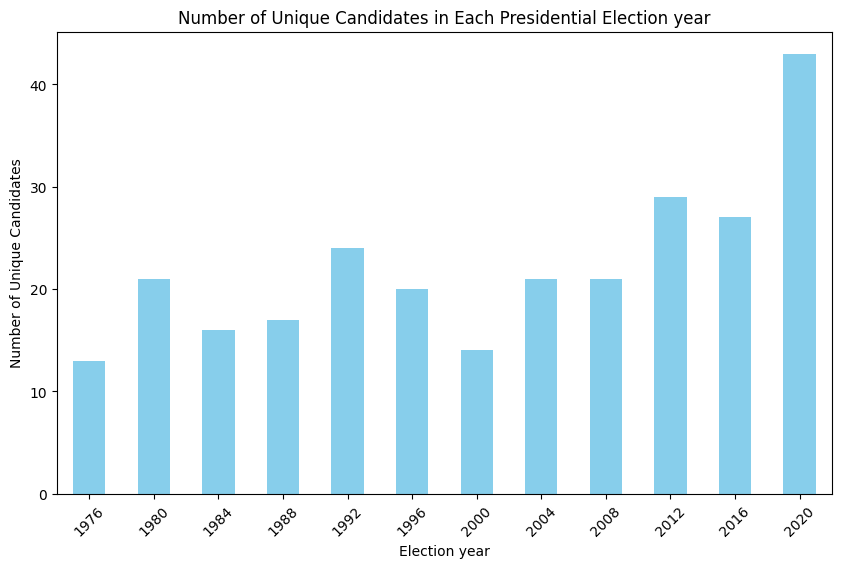

In [15]:
# Group the data by election year and count the unique candidates
unique_candidates_by_year = df.groupby('year')['candidate'].nunique()

# Create a bar chart
plt.figure(figsize=(10, 6))
unique_candidates_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Candidates in Each Presidential Election year')
plt.xlabel('Election year')
plt.ylabel('Number of Unique Candidates')
plt.xticks(rotation=45)
plt.show()

## **2.Which state had the highest voter turnout in each election year?**

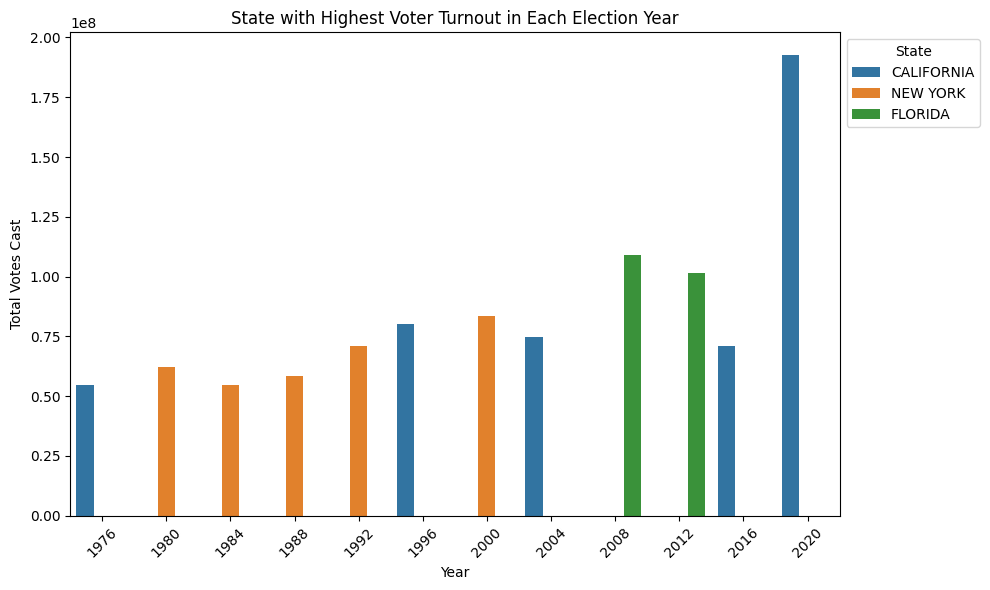

In [28]:
# Group the data by year and state, and calculate the total votes cast in each state for each year
state_turnout = df.groupby(['year', 'state'])['totalvotes'].sum().reset_index()

# Find the state with the highest voter turnout in each year
max_turnout = state_turnout.groupby('year')['totalvotes'].idxmax()
state_max_turnout = state_turnout.loc[max_turnout]

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='totalvotes', hue='state', data=state_max_turnout)
plt.title("State with Highest Voter Turnout in Each Election Year")
plt.xlabel("Year")
plt.ylabel("Total Votes Cast")
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## **3.Were there any significant differences in voter turnout between states with different political affiliations?**

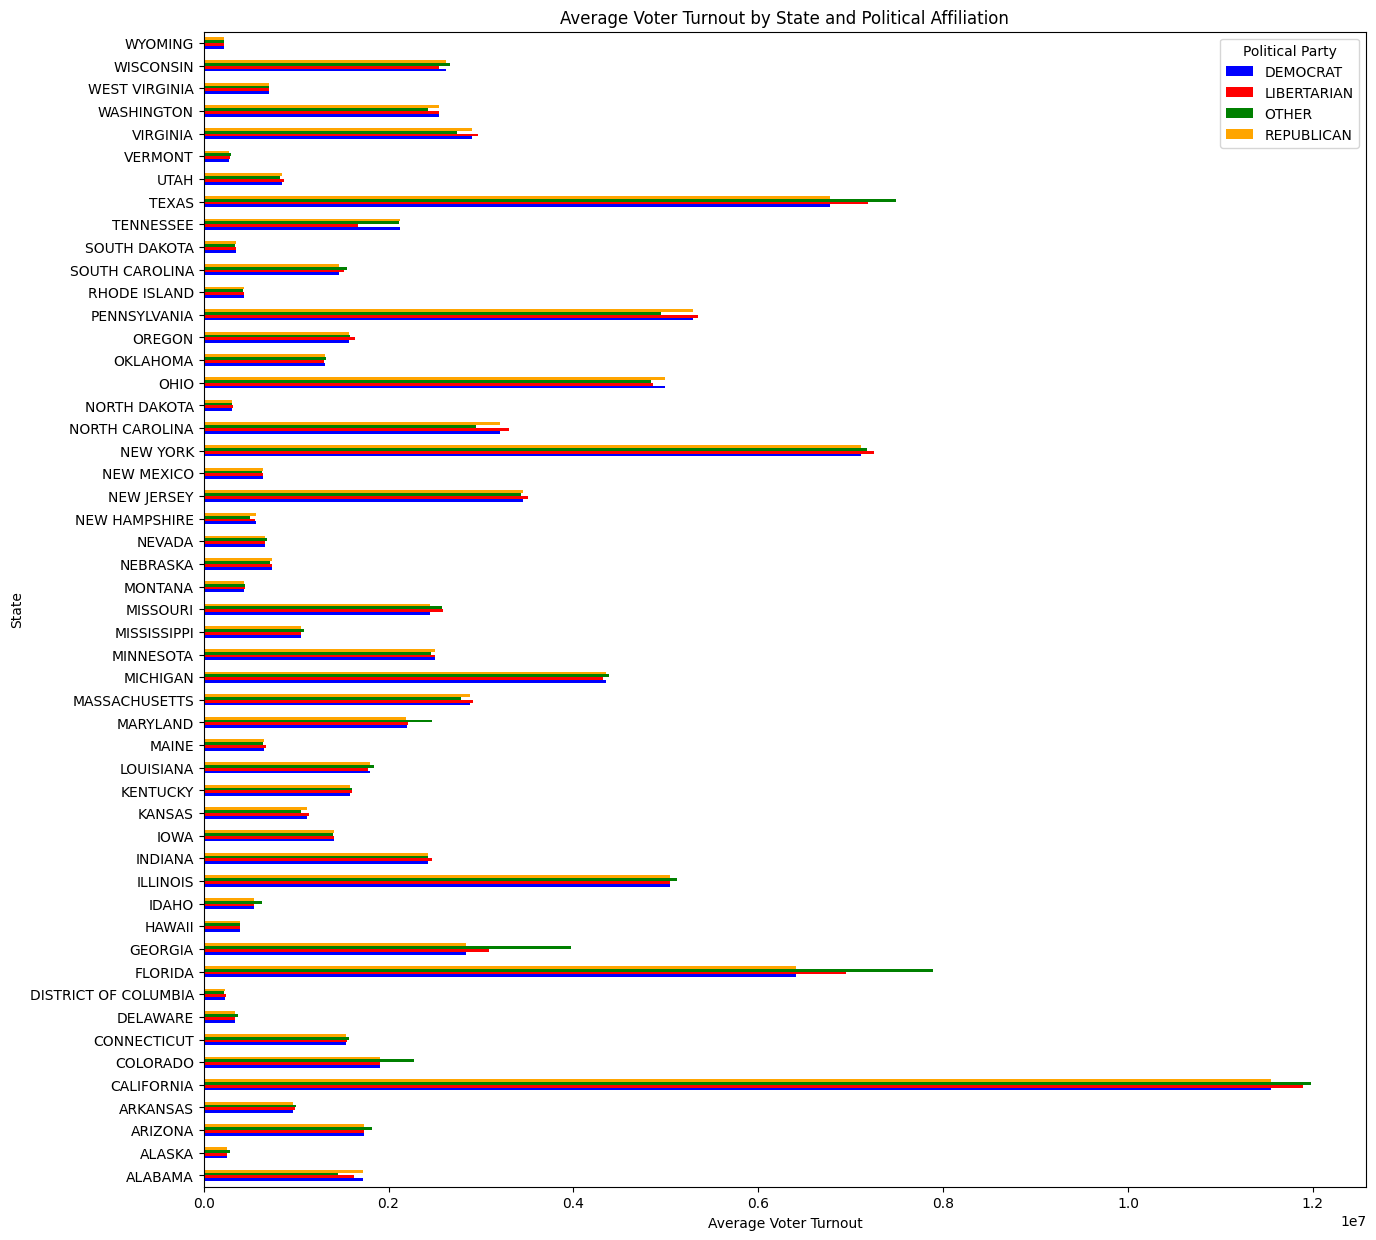

In [36]:
# Calculate the average voter turnout for each political party in different states
avg_turnout = df.groupby(['state', 'party_simplified'])['totalvotes'].mean().unstack()

# Plotting the data
colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow']  # Assigning colors for different parties
ax = avg_turnout.plot(kind='barh', figsize=(15, 15), color=colors)
ax.set_xlabel('Average Voter Turnout')
ax.set_ylabel('State')
ax.set_title('Average Voter Turnout by State and Political Affiliation')
ax.legend(title='Political Party')

# Show the plot
plt.show()

## **4.Which candidate received the highest number of votes across all election years?**

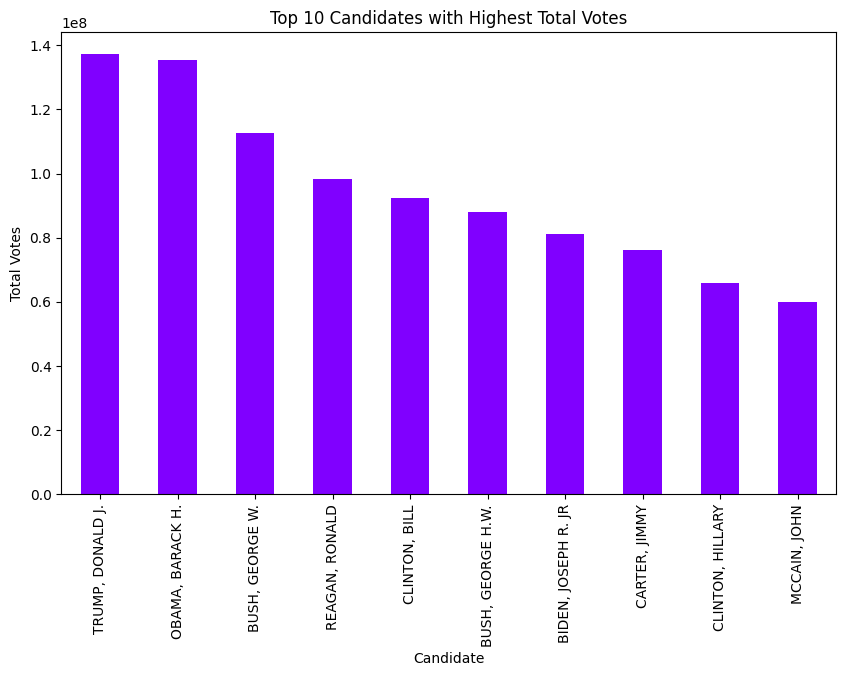

In [39]:
# Group the data by candidate and calculate the total votes
candidate_votes = df.groupby('candidate')['candidatevotes'].sum()

# Get the top 10 candidates with the highest total votes
top_10_candidates = candidate_votes.nlargest(10)

# Plotting the data
ax = top_10_candidates.plot(kind='bar', colormap='rainbow', figsize=(10, 6))
ax.set_xlabel('Candidate')
ax.set_ylabel('Total Votes')
ax.set_title('Top 10 Candidates with Highest Total Votes')

# Show the plot
plt.show()

## **5.How did the voting patterns vary for each major party (DEMOCRAT, REPUBLICAN) across different states?**

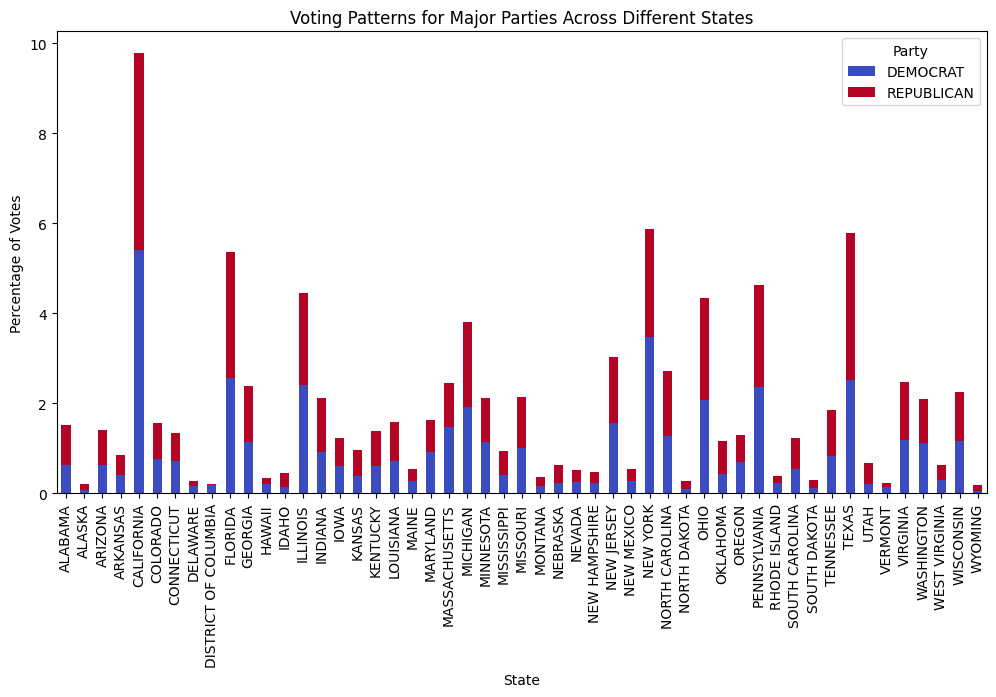

In [41]:
# Filter the data for major parties (DEMOCRAT, REPUBLICAN)
major_parties = df[df['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]

# Group the data by state and party, and calculate the average percentage of votes
grouped_df = major_parties.groupby(['state', 'party_simplified'])['Percentage'].mean()

# Pivot the data to have separate columns for each major party's percentage of votes in each state
pivot_df = grouped_df.unstack()

# Plotting the data
ax = pivot_df.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
ax.set_xlabel('State')
ax.set_ylabel('Percentage of Votes')
ax.set_title('Voting Patterns for Major Parties Across Different States')
ax.legend(title='Party')

# Show the plot
plt.show()

## **6.Did any candidate win the majority of votes in their home state in any election year?**

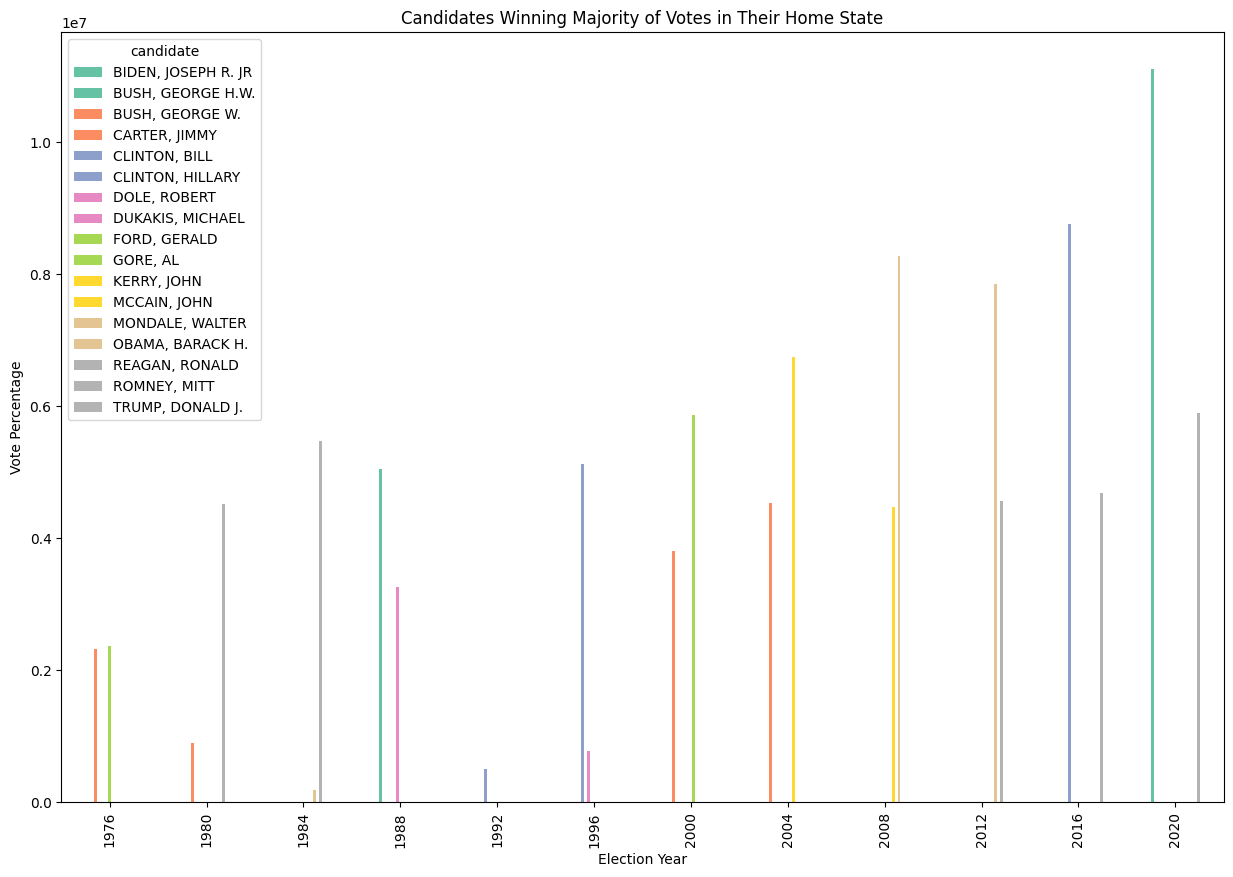

In [46]:
# Filter the data for candidates who won the majority of votes in their home state
home_state_winners = df[df['candidatevotes'] / df.groupby(['year', 'state_po'])['candidatevotes'].transform('sum') >= 0.5]

# Aggregate the data to remove duplicate entries
aggregated_df = home_state_winners.groupby(['year', 'candidate'])['candidatevotes'].max().unstack()

# Plotting the data
ax = aggregated_df.plot(kind='bar', stacked=False, colormap='Set2', figsize=(15, 10))
ax.set_xlabel('Election Year')
ax.set_ylabel('Vote Percentage')
ax.set_title('Candidates Winning Majority of Votes in Their Home State')

# Show the plot
plt.show()

## **7.How did the number of candidates running for office change over the years, and were there any notable trends or patterns?**

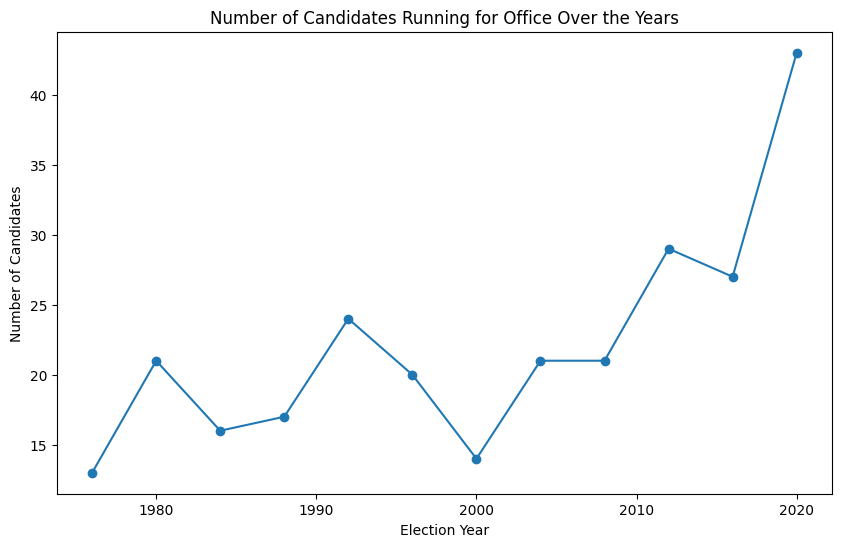

In [48]:
# Group the data by election year and count the number of unique candidates
candidates_count = df.groupby('year')['candidate'].nunique()

# Plotting the data
ax = candidates_count.plot(marker='o', linestyle='-', figsize=(10, 6))
ax.set_xlabel('Election Year')
ax.set_ylabel('Number of Candidates')
ax.set_title('Number of Candidates Running for Office Over the Years')

# Show the plot
plt.show()

Based on the analysis of the dataset, here is a summary of the findings for each of the seven questions:

1. The number of unique candidates participating in each presidential election year varied. By examining the 'candidate' column and counting the unique values, you can determine the number of candidates for each year.

2. The state with the highest voter turnout differed in each election year. By grouping the data by election year and calculating the total votes cast in each state, you can identify the state with the highest voter turnout for each year.

3. There might be significant differences in voter turnout between states with different political affiliations. By comparing the voter turnout across states with different party affiliations, you can identify any notable variations and draw conclusions on whether political affiliation plays a role in voter turnout.

4. The candidate who received the highest number of votes across all election years can be determined by calculating the total votes received by each candidate and identifying the candidate with the highest count.

5. Voting patterns for major parties (DEMOCRAT, REPUBLICAN) may vary across different states. By analyzing the voting results for each major party across states, you can observe any variations or trends in voting patterns and draw conclusions about the parties' performances in different regions.

6. By examining the voting results for each candidate in their respective home state, you can identify if any candidate won the majority of votes in their home state in any election year.

7. The number of candidates running for office changed over the years. By analyzing the count of unique candidates in each election year, you can observe trends or patterns in candidate participation. This analysis may reveal any notable increases or decreases in the number of candidates over time.
